In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4a73f5a0bd504b025e8363b55abd50fe9900de986f1d45330dd3eb72bee39298
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2

from keras import layers
from keras.models import Sequential
import pathlib

In [ ]:
!gdown --id 19YM4EMk5Rpf7-FJ0Hw7X381pW087cftK
!unzip archive.zip
!rm archive.zip
!mv images cat_imgs

Streaming output truncated to the last 5000 lines.
  inflating: images/Tortoiseshell/46495717_25061.jpg  
  inflating: images/Tortoiseshell/46495784_25049.jpg  
  inflating: images/Tortoiseshell/46495794_25052.jpg  
  inflating: images/Tortoiseshell/46496797_24946.jpg  
  inflating: images/Tortoiseshell/46497000_24936.jpg  
  inflating: images/Tortoiseshell/46497664_24825.jpg  
  inflating: images/Tortoiseshell/46500078_24567.jpg  
  inflating: images/Tortoiseshell/46504471_24003.jpg  
  inflating: images/Tortoiseshell/46507777_23590.jpg  
  inflating: images/Tortoiseshell/46510043_23381.jpg  
  inflating: images/Tortoiseshell/46510643_23331.jpg  
  inflating: images/Tortoiseshell/46512081_23194.jpg  
  inflating: images/Tortoiseshell/46513326_23056.jpg  
  inflating: images/Tortoiseshell/46513392_23048.jpg  
  inflating: images/Tortoiseshell/46515915_22642.jpg  
  inflating: images/Tortoiseshell/46518048_22389.jpg  
  inflating: images/Tortoiseshell/46518676_22313.jpg  
  inflating: i

In [ ]:
image_dim = 300

In [ ]:
img_size = 300

In [ ]:
dataset_url = "./cat_imgs"

In [ ]:
count = 0
for filename in os.listdir('cat_imgs'):
  count += 1
print(count)

67


In [ ]:
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir = dataset_url
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  American Curl
processing class directory  Domestic Medium Hair
processing class directory  Extra-Toes Cat - Hemingway Polydactyl
processing class directory  American Wirehair
processing class directory  Domestic Long Hair
processing class directory  Oriental Tabby
processing class directory  Tuxedo
processing class directory  Oriental Short Hair
processing class directory  Cornish Rex
processing class directory  Russian Blue
processing class directory  Himalayan
processing class directory  Dilute Tortoiseshell
processing class directory  Oriental Long Hair
processing class directory  Singapura
processing class directory  Silver
processing class directory  Tabby
processing class directory  Turkish Van
processing class directory  Balinese
processing class directory  Norwegian Forest Cat
processing class directory  Tortoiseshell
processing class directory  Turkish Angora
processing class directory  Bengal
processing class directory  Japanese Bobtail
processing 

In [ ]:
!rm ./cat_imgs/Abyssinian/17870903_240.jpg ./cat_imgs/Somali/33477513_41.jpg

In [ ]:
training_df = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split=0.15,
  subset = "training",
  seed = 69,
  image_size = (image_dim, image_dim),
  batch_size = 32)

Found 126605 files belonging to 67 classes.
Using 107615 files for training.


In [ ]:
validation_df = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split = 0.15,
  subset = "validation",
  seed = 69,
  image_size = (image_dim, image_dim),
  batch_size = 32)

Found 126605 files belonging to 67 classes.
Using 18990 files for validation.


In [ ]:
count = 0
for filename in os.listdir('cat_imgs'):
  count += 1
print(count)

67


In [ ]:
breeds = training_df.class_names
num_classes = len(breeds)
print(breeds)

['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Wirehair', 'Applehead Siamese', 'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Burmilla', 'Calico', 'Canadian Hairless', 'Chartreux', 'Chausie', 'Chinchilla', 'Cornish Rex', 'Cymric', 'Devon Rex', 'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Long Hair', 'Domestic Medium Hair', 'Domestic Short Hair', 'Egyptian Mau', 'Exotic Shorthair', 'Extra-Toes Cat - Hemingway Polydactyl', 'Havana', 'Himalayan', 'Japanese Bobtail', 'Javanese', 'Korat', 'LaPerm', 'Maine Coon', 'Manx', 'Munchkin', 'Nebelung', 'Norwegian Forest Cat', 'Ocicat', 'Oriental Long Hair', 'Oriental Short Hair', 'Oriental Tabby', 'Persian', 'Pixiebob', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Silver', 'Singapura', 'Snowshoe', 'Somali', 'Sphynx - Hairless Cat', 'Tabby', 'Tiger', 'Tonkinese', 'Torbie', 'Tortoiseshell', 'Turkish Angora', 'Turkish Van', 'Tuxedo

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE

#train_ds = training_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = validation_df.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#normalise = layers.Rescaling(1./255)
#normalised_df = train_ds.map(lambda x, y: (normalise(x), y))

#image_batch, labels_batch = next(iter(normalised_df))
#first_image = image_batch[0]
#print(np.min(first_image), np.max(first_image))

In [ ]:
aug_imgs = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(image_dim,
                                  image_dim,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  aug_imgs,
  layers.Rescaling(1./255, input_shape=(image_dim, image_dim, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 dropout_6 (Dropout)         (None, 150, 150, 32)      0         
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
iterations = 10

In [ ]:
aug_learning = model.fit(
  training_df,
  validation_data = validation_df,
  epochs=iterations,
  batch_size=16,
)

Epoch 1/10
3363/3363 [==============================] - 248s 63ms/step - loss: 2.5543 - accuracy: 0.4200 - val_loss: 2.5536 - val_accuracy: 0.4110
Epoch 2/10
3363/3363 [==============================] - 211s 63ms/step - loss: 2.4432 - accuracy: 0.4206 - val_loss: 2.5110 - val_accuracy: 0.4116
Epoch 3/10
3363/3363 [==============================] - 212s 63ms/step - loss: 2.3942 - accuracy: 0.4221 - val_loss: 2.4744 - val_accuracy: 0.4124
Epoch 4/10
3363/3363 [==============================] - 212s 63ms/step - loss: 2.3594 - accuracy: 0.4236 - val_loss: 2.4228 - val_accuracy: 0.4147
Epoch 5/10
3363/3363 [==============================] - 211s 63ms/step - loss: 2.3326 - accuracy: 0.4258 - val_loss: 2.4073 - val_accuracy: 0.4170
Epoch 6/10
3363/3363 [==============================] - 211s 63ms/step - loss: 2.3092 - accuracy: 0.4280 - val_loss: 2.3859 - val_accuracy: 0.4157
Epoch 7/10
3363/3363 [==============================] - 210s 62ms/step - loss: 2.2943 - accuracy: 0.4291 - val_loss: 2

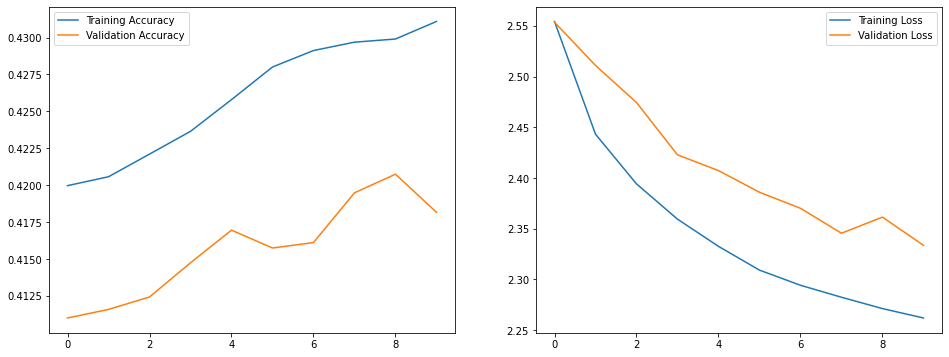

In [ ]:
acc = aug_learning.history['accuracy']
val_acc = aug_learning.history['val_accuracy']

loss = aug_learning.history['loss']
val_loss = aug_learning.history['val_loss']

epochs_range = range(iterations)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
print(breeds)

['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair', 'American Wirehair', 'Applehead Siamese', 'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Burmilla', 'Calico', 'Canadian Hairless', 'Chartreux', 'Chausie', 'Chinchilla', 'Cornish Rex', 'Cymric', 'Devon Rex', 'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Long Hair', 'Domestic Medium Hair', 'Domestic Short Hair', 'Egyptian Mau', 'Exotic Shorthair', 'Extra-Toes Cat - Hemingway Polydactyl', 'Havana', 'Himalayan', 'Japanese Bobtail', 'Javanese', 'Korat', 'LaPerm', 'Maine Coon', 'Manx', 'Munchkin', 'Nebelung', 'Norwegian Forest Cat', 'Ocicat', 'Oriental Long Hair', 'Oriental Short Hair', 'Oriental Tabby', 'Persian', 'Pixiebob', 'Ragamuffin', 'Ragdoll', 'Russian Blue', 'Scottish Fold', 'Selkirk Rex', 'Siamese', 'Siberian', 'Silver', 'Singapura', 'Snowshoe', 'Somali', 'Sphynx - Hairless Cat', 'Tabby', 'Tiger', 'Tonkinese', 'Torbie', 'Tortoiseshell', 'Turkish Angora', 'Turkish Van', 'Tuxedo

In [ ]:
def predict_cat_breed(img):
  img = img.resize((image_dim, image_dim))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  prediction = breeds[np.argmax(score)]
  confidence = 100 * np.max(score)

  return prediction, confidence

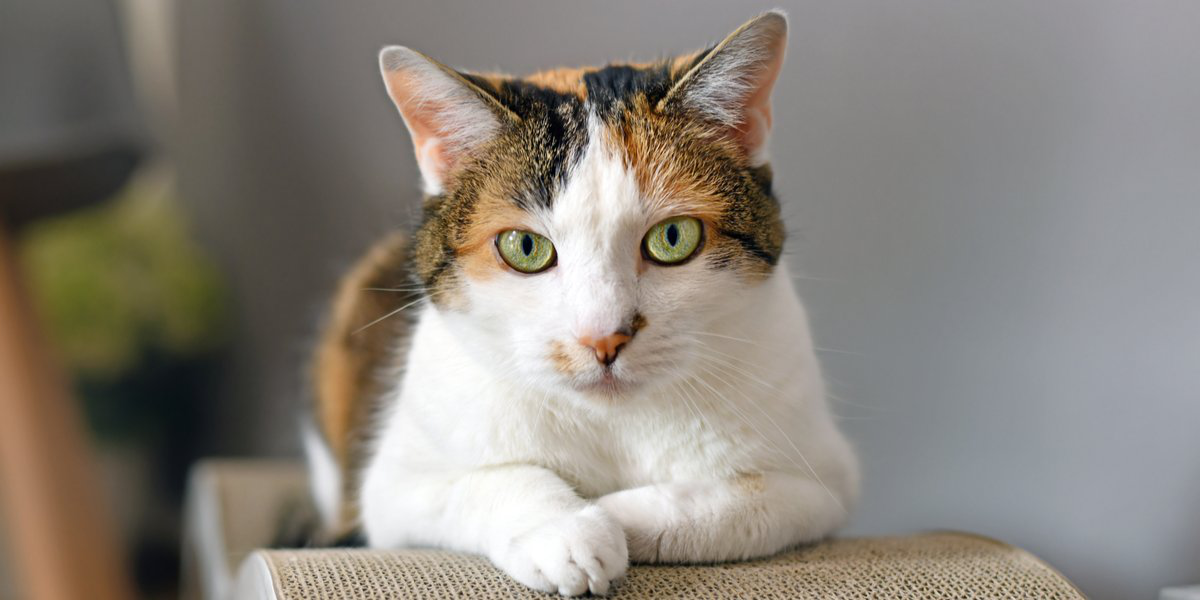

Prediction Breed:  Domestic Short Hair
Confidence:  38.80021572113037 %


In [ ]:
img = Image.open(r"calico.jpg")
display(img)
prediction, confidence = predict_cat_breed(img)

print("Prediction Breed: ", prediction)
print("Confidence: ", confidence, "%")

# GRACE CODE IS BELOW

In [ ]:
from tensorflow.keras import applications

InceptionV3 = applications.InceptionV3(include_top=False, input_shape=(
    300, 300, 3), weights='imagenet')

In [ ]:
import keras.layers as l
from tensorflow.keras.models import Sequential, load_model
import numpy as np

model2 = Sequential(aug_imgs)

for layer in InceptionV3.layers:
    layer.trainable = False

model2.add(InceptionV3)
model2.add(l.GlobalAveragePooling2D())
model2.add(l.Dropout(0.2))
model2.add(l.Dense(120))

model2.summary()

In [ ]:
model2 = Sequential([
  aug_imgs,
  layers.Rescaling(1./255, input_shape=(image_dim, image_dim, 3)),
  InceptionV3,
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

mc = ModelCheckpoint(
    'Inception-base.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto'
)

rlr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [mc, es, rlr]

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model2.compile(
        optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
    )


In [ ]:
epochs = 20

In [ ]:
print(len(training_df)*32)

In [ ]:
model2 = load_model("dogmodel.h5")

In [ ]:
unfreeze_model(model2)

hist = model2.fit(
    training_df,
    validation_data=validation_df,
    epochs=epochs,
    #batch_size=16,
    callbacks=callbacks
)